In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

import missingno
import sklearn

import xgboost as xgb
from xgboost import plot_tree

import scikitplot as skplt

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1p5qOHBkiRing9gEd341mz9LVvEGtlbpL"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

X = df.drop(['enrollee_id','target'], axis = 1)
Y = df['target']


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


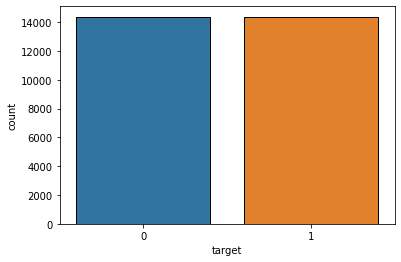

In [2]:
smote = SMOTE(random_state = 42)
X, Y = smote.fit_resample(X,Y)

sns.countplot(Y, edgecolor = 'black')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# End of Data PreProcessing

In [4]:
# Separate the data in Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)
X_train.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
3274,1,0,3,0,8,4,4,1,64,0.624,1,5
6325,1,0,2,0,16,5,0,1,6,0.924,1,133
2425,2,1,3,0,11,3,1,5,95,0.855,0,78
15404,1,0,2,0,10,3,0,4,83,0.762,1,83
26265,1,0,2,0,9,3,0,2,5,0.920,0,90


In [5]:
columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
0,-0.169639,1.326784,-0.101984,-0.310699,-0.645860,1.112375,2.896987,-0.500517,-1.177134,0.878873,-1.295013,0.856360
1,-0.169639,-0.532653,-0.101984,-0.310699,0.538547,0.494365,-0.522807,1.979117,0.100037,0.878873,-1.295013,-0.572465
2,-0.169639,-0.532653,1.466767,-0.310699,1.722955,0.494365,-0.522807,1.979117,-0.451469,0.705178,0.772193,-0.711862
3,-0.169639,-0.532653,-0.101984,1.909736,0.982700,-0.123645,-0.522807,1.979117,-1.177134,0.878873,-1.295013,0.263921
4,-0.169639,-0.532653,-0.101984,-0.310699,0.982700,-0.123645,-0.522807,1.979117,-1.177134,0.878873,-1.295013,2.354883


In [6]:
Y_train.value_counts(normalize=True)

1    0.500022
0    0.499978
Name: target, dtype: float64

In [7]:
Y_test.value_counts(normalize=True)

0    0.500087
1    0.499913
Name: target, dtype: float64

In [8]:
%%time
clf = KNeighborsClassifier()

clf.fit(X_train, Y_train)

CPU times: user 926 ms, sys: 802 µs, total: 926 ms
Wall time: 920 ms


KNeighborsClassifier()

In [9]:
%%time
clf.predict(X_test)

CPU times: user 1.61 s, sys: 0 ns, total: 1.61 s
Wall time: 1.61 s


array([1, 1, 0, ..., 1, 1, 0])

In [10]:
%%time
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9093853000660655
Test AUC Score 0.8074432589193561
 
Acuracy  0.7444811402746393
ROC_AUC  0.8074432589193561
PR  0.7607611135839557
 
[[2019  858]
 [ 612 2264]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2877
           1       0.73      0.79      0.75      2876

    accuracy                           0.74      5753
   macro avg       0.75      0.74      0.74      5753
weighted avg       0.75      0.74      0.74      5753

CPU times: user 9.79 s, sys: 11.8 ms, total: 9.8 s
Wall time: 9.8 s


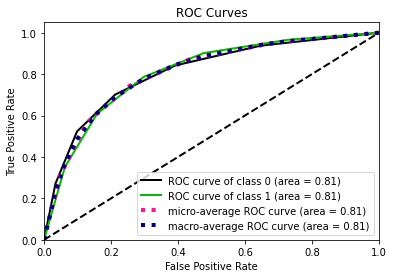

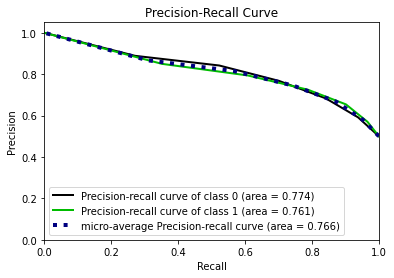

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

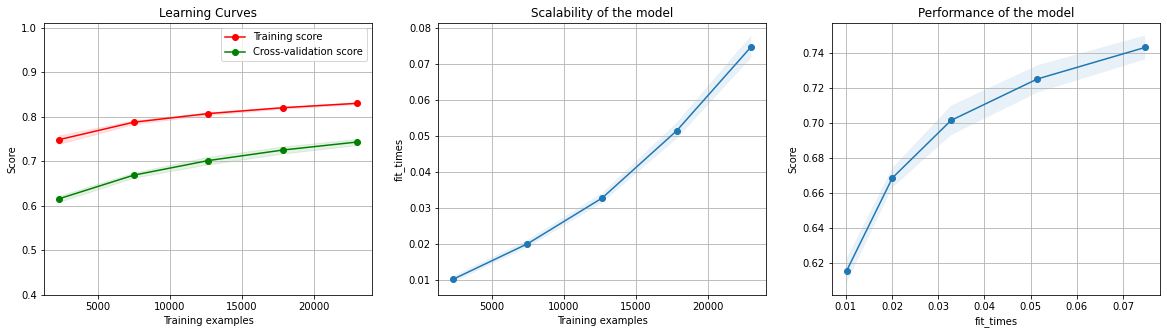

In [11]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [12]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [13]:
%%time
parameters = [{    
     #'leaf_size'        : list(range(5,15)),
     'n_neighbors' : list(range(1,30))
     #'p'            : [1,2]
}]

eval_set = [(X_test, Y_test)]

GridSearch = GridSearchCV(KNeighborsClassifier(), param_grid = parameters, n_jobs=-1, cv=5, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train)


CPU times: user 1.55 s, sys: 74.6 ms, total: 1.63 s
Wall time: 1min 8s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]}],
             scoring='roc_auc')

Understanding Bias & Variance: https://www.coursera.org/lecture/machine-learning/learning-curves-Kont7
https://elitedatascience.com/bias-variance-tradeoff

In [14]:
GridSearch.best_params_

{'n_neighbors': 21}

In [15]:
%%time
clf = KNeighborsClassifier(
    n_neighbors = 3
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train)
#clf.fit(X_train, Y_train, early_stopping_rounds=10)

CPU times: user 962 ms, sys: 56 µs, total: 962 ms
Wall time: 955 ms


KNeighborsClassifier(n_neighbors=3)

In [16]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 2.54 s, sys: 3.75 ms, total: 2.54 s
Wall time: 2.54 s


In [17]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9418545536227522
Test AUC Score 0.7957093885948844
 
Acuracy  0.7411785155571007
ROC_AUC  0.7957093885948844
PR  0.7396632266193214
 
[[2007  870]
 [ 619 2257]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2877
           1       0.72      0.78      0.75      2876

    accuracy                           0.74      5753
   macro avg       0.74      0.74      0.74      5753
weighted avg       0.74      0.74      0.74      5753



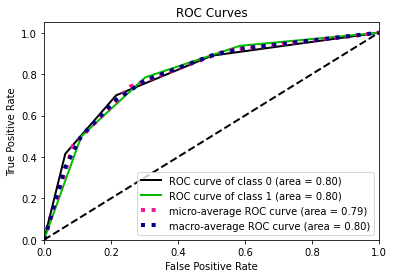

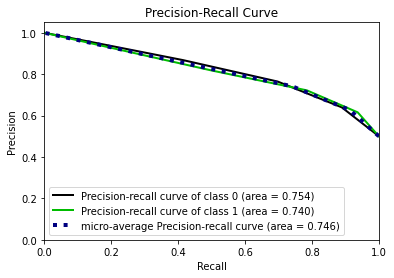

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

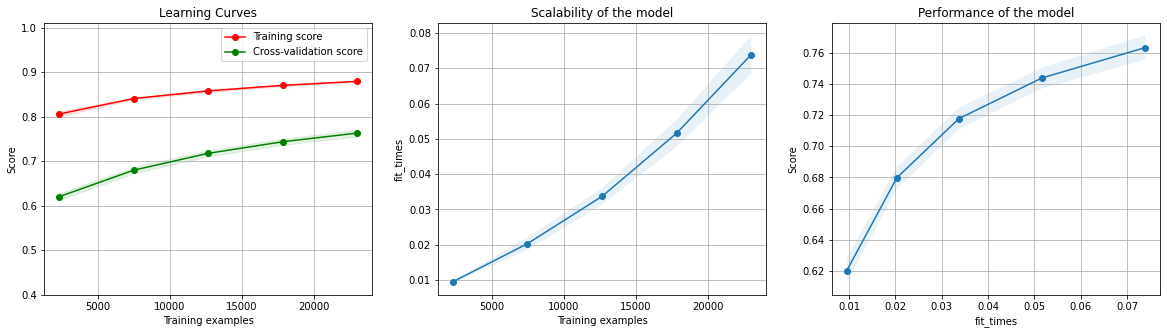

In [18]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [19]:
%%time
parameters = [{    
     'leaf_size'        : list(range(1,50)),
     'n_neighbors' : [3]
}]

eval_set = [(X_test, Y_test)]

GridSearch = GridSearchCV(KNeighborsClassifier(), param_grid = parameters, n_jobs=-1, cv=5, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train)

CPU times: user 2.02 s, sys: 92.1 ms, total: 2.11 s
Wall time: 1min 38s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'n_neighbors': [3]}],
             scoring='roc_auc')

In [20]:
GridSearch.best_params_

{'leaf_size': 3, 'n_neighbors': 3}

In [21]:
%%time
clf = KNeighborsClassifier(
    leaf_size = 3,
    n_neighbors = 3
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train)

CPU times: user 955 ms, sys: 105 µs, total: 955 ms
Wall time: 950 ms


KNeighborsClassifier(leaf_size=3, n_neighbors=3)

In [22]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 3.93 s, sys: 3.69 ms, total: 3.94 s
Wall time: 3.93 s


In [23]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9418545536227522
Test AUC Score 0.795785467979462
 
Acuracy  0.7413523379106554
ROC_AUC  0.795785467979462
PR  0.7397292195841314
 
[[2008  869]
 [ 619 2257]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2877
           1       0.72      0.78      0.75      2876

    accuracy                           0.74      5753
   macro avg       0.74      0.74      0.74      5753
weighted avg       0.74      0.74      0.74      5753



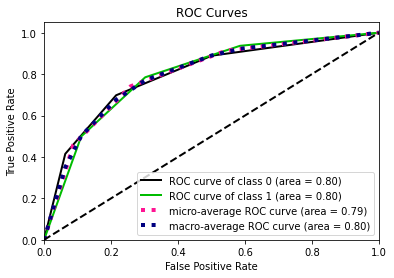

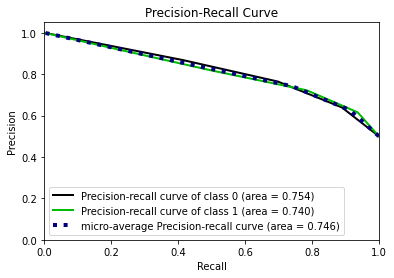

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

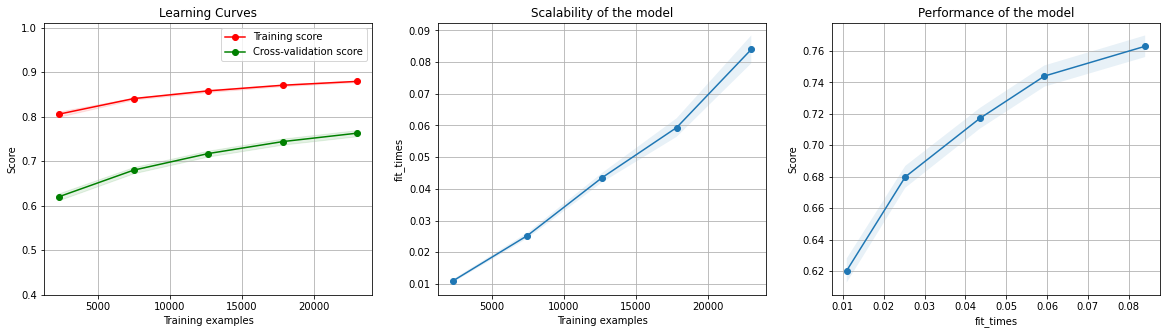

In [24]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.plot()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [25]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 3,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [26]:
%%time
parameters = [{    
     'leaf_size'  : [3],
     'n_neighbors' : [3]
    ,'p' : [1,2]
}]

eval_set = [(X_test, Y_test)]

GridSearch = GridSearchCV(KNeighborsClassifier(), param_grid = parameters, n_jobs=-1, cv=10, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train)

CPU times: user 1.03 s, sys: 12.3 ms, total: 1.04 s
Wall time: 9.31 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'leaf_size': [3], 'n_neighbors': [3], 'p': [1, 2]}],
             scoring='roc_auc')

In [27]:
GridSearch.best_params_

{'leaf_size': 3, 'n_neighbors': 3, 'p': 1}

In [28]:
%%time
clf = KNeighborsClassifier(
    leaf_size = 3,
    n_neighbors = 3,
    p = 1
)


eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train)

CPU times: user 941 ms, sys: 12 ms, total: 953 ms
Wall time: 949 ms


KNeighborsClassifier(leaf_size=3, n_neighbors=3, p=1)

In [29]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 5.41 s, sys: 0 ns, total: 5.41 s
Wall time: 5.4 s


In [30]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9467228638875641
Test AUC Score 0.8060456099234106
 
Acuracy  0.7521293238310447
ROC_AUC  0.8060456099234106
PR  0.7487632484670391
 
[[2023  854]
 [ 572 2304]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      2877
           1       0.73      0.80      0.76      2876

    accuracy                           0.75      5753
   macro avg       0.75      0.75      0.75      5753
weighted avg       0.75      0.75      0.75      5753



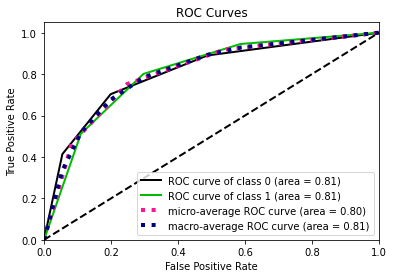

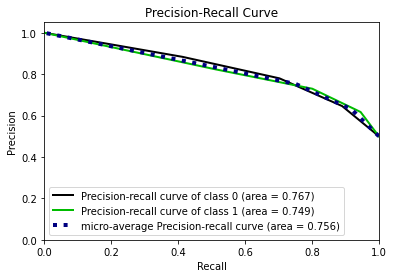

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

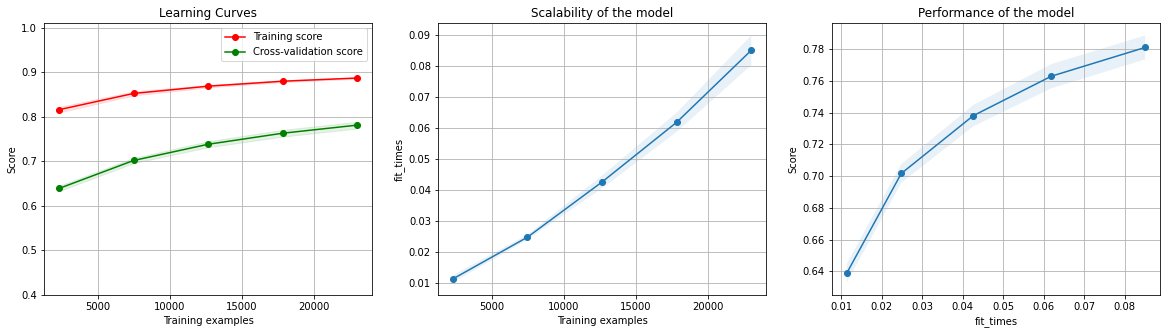

In [31]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.plot()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [32]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 3,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

In [33]:
%%time
clf = KNeighborsClassifier(
    leaf_size = 3,
    n_neighbors = 100,
    p = 1
)


eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train)

CPU times: user 950 ms, sys: 4.06 ms, total: 954 ms
Wall time: 944 ms


KNeighborsClassifier(leaf_size=3, n_neighbors=100, p=1)

In [34]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 15.4 s, sys: 7.67 ms, total: 15.4 s
Wall time: 15.4 s


In [35]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8250498097821652
Test AUC Score 0.8251255219202897
 
Acuracy  0.752998435598818
ROC_AUC  0.8251255219202897
PR  0.8115109547876992
 
[[2092  785]
 [ 636 2240]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      2877
           1       0.74      0.78      0.76      2876

    accuracy                           0.75      5753
   macro avg       0.75      0.75      0.75      5753
weighted avg       0.75      0.75      0.75      5753



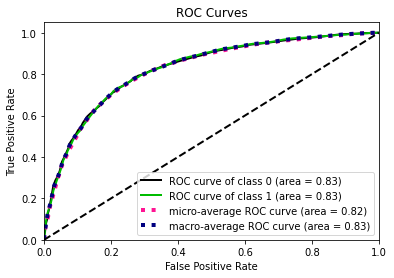

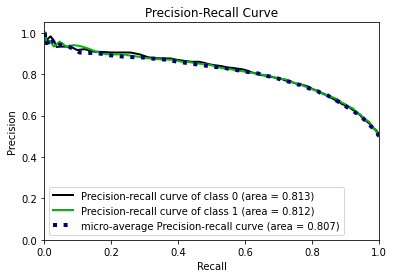

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

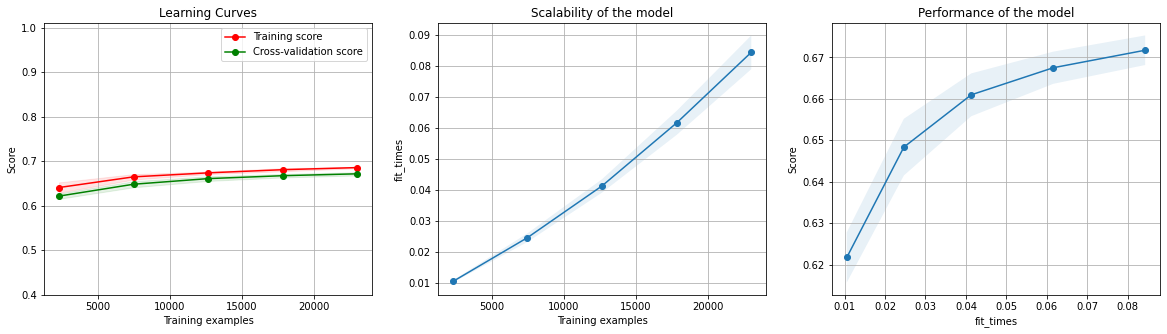

In [36]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.plot()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [37]:
%%time
clf = KNeighborsClassifier(
    leaf_size = 3,
    n_neighbors = 50,
    p = 1 # manhattan_distance > euclidean_distance
    ,algorithm = 'auto' #no impact
    ,weights = 'uniform' #distance introduces high variance / overfitting    
)


eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train)

CPU times: user 922 ms, sys: 4.04 ms, total: 926 ms
Wall time: 916 ms


KNeighborsClassifier(leaf_size=3, n_neighbors=50, p=1)

In [38]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 12.3 s, sys: 0 ns, total: 12.3 s
Wall time: 12.3 s


In [39]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8366643176547175
Test AUC Score 0.8285564664938897
 
Acuracy  0.7552581261950286
ROC_AUC  0.8285564664938897
PR  0.8114387858892527
 
[[2114  763]
 [ 645 2231]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      2877
           1       0.75      0.78      0.76      2876

    accuracy                           0.76      5753
   macro avg       0.76      0.76      0.76      5753
weighted avg       0.76      0.76      0.76      5753



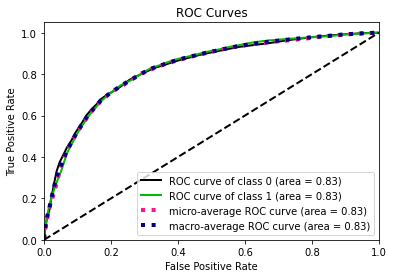

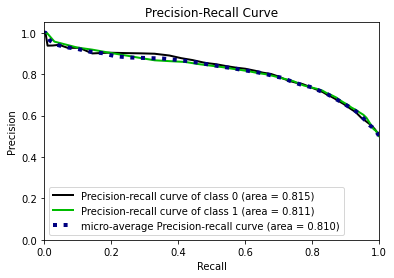

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

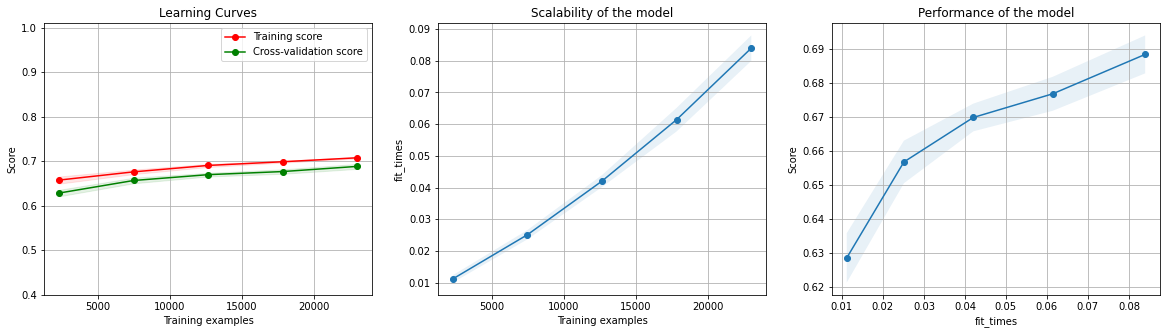

In [40]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.plot()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

Minimum error:- 0.24543716321918999 at K = 7


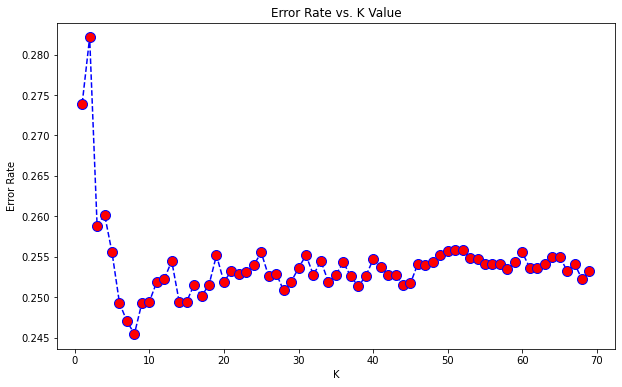

In [41]:
error_rate = []
for i in range(1,70):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.75456283678081 at K = 7


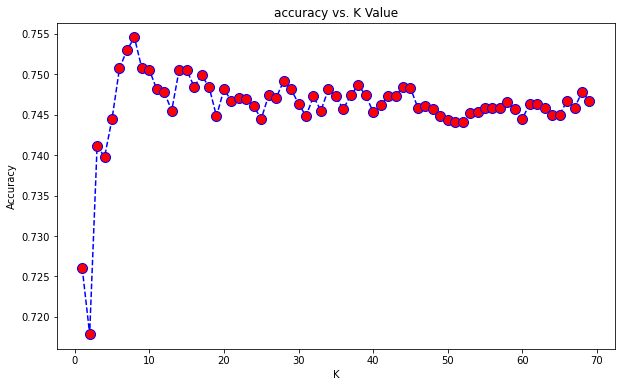

In [42]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,70):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,70),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))